In [3]:
# 矩阵的秩计算
import numpy as np 
M = np.array([[1,2], [2, 4]])
np.linalg.matrix_rank(M, tol=None)

1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


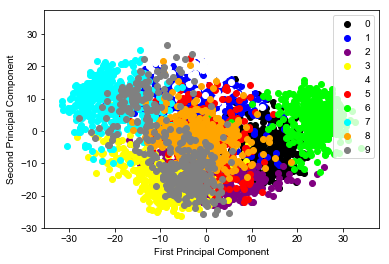

In [8]:
# 将64维的手写体数字图片经PCA压缩为二维空间分布
import pandas as pd
# 导入训练集测试集
digits_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes', header=None)

X_digits = digits_train[np.arange(64)]
y_digits = digits_train[64]

# 导入PCA
from sklearn.decomposition import PCA

estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)

# 显示10类手写体数字图片经PCA压缩后的二维分布
from matplotlib import pyplot as plt


def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    
    for i in range(len(colors)):
        px = X_pca[:, 0][y_digits.as_matrix() == i]
        py = X_pca[:, 1][y_digits.as_matrix() == i]
        plt.scatter(px, py, c=colors[i])
        
    plt.legend(np.arange(0, 10).astype(str))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
plot_pca_scatter()

##### 训练两个支持向量机（分类）识别手写体数字图像
##### 一个使用原始六十四维度的像素特征，另一个采用经过PCA压缩重建后的低唯特征。

In [9]:
# 原始六十四维数据训练
X_train = digits_train[np.arange(64)]
X_test = digits_test[np.arange(64)]

y_train = digits_train[64]
y_test = digits_test[64]

from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


# 降维为20维度的数据训练
estimator = PCA(n_components=20)

pca_X_train = estimator.fit_transform(X_train)
pca_X_test = estimator.transform(X_test)

pca_svc = LinearSVC()
pca_svc.fit(pca_X_train, y_train)
pca_y_pred = pca_svc.predict(pca_X_test)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
#性能评估
from sklearn.metrics import classification_report

print(svc.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=np.arange(10).astype(str)))

print(pca_svc.score(pca_X_test, y_test))
print(classification_report(y_test, pca_y_pred, target_names=np.arange(10).astype(str)))

0.9304396215915415
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       178
           1       0.94      0.83      0.88       182
           2       0.96      0.98      0.97       177
           3       0.98      0.90      0.93       183
           4       0.95      0.98      0.96       181
           5       0.89      0.97      0.93       182
           6       0.99      0.98      0.98       181
           7       0.98      0.92      0.95       179
           8       0.78      0.91      0.84       174
           9       0.89      0.87      0.88       180

    accuracy                           0.93      1797
   macro avg       0.93      0.93      0.93      1797
weighted avg       0.93      0.93      0.93      1797

0.9148580968280468
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       178
           1       0.91      0.82      0.86       182
           2       0.95      0.95      0

In [11]:
# 尽管PCA压缩后损失了2%左右的预测准确性，但是降低了68.75%的维度

### 相较于损失的少部分模型性能，维度压缩能够节省大量用于模型训练的时间。使得PCA所带来的模型综合效率变得更加划算。